In [1]:
import ROOT
import math
ROOT.gStyle.SetOptStat(0)
f = ROOT.TFile("/Users/dstocks/work/BoostedDM-gallery/srcs/MCParticleDistributionsTEST.root", "READ")

Welcome to JupyROOT 6.12/06


In [2]:
t = f.Get("MCParticles")

Here, I create dictionaries that hold the histograms and canvases for each type of particle in "particles" that will display their leading momenta moduli and energies. I also create the lists "max_overall_P" and "max_overall_E" which hold the overall max value for P or E in a single event, which will be shown in two separate histograms.

Note that I initialize the values of the keys in max_particle_P and max_particle_E to be empty lists to fill later on.

In [3]:
particles = ['Proton', 'Neutron', 'Pion', 'Pi0', 'Meson', 'Baryon']
hN_P = {}
cN_P = {}
hN_E = {}
cN_E = {}
max_particle_P = {}
max_particle_E = {}
max_overall_P = []
max_overall_E = []

for i in particles:
    max_particle_P[i] = []
    max_particle_E[i] = []

I begin by looping over the events and creating a variable to hold the leading P and leading E for each event (over all types of particles). Then I loop over each particle type in "particles" and define variables to hold the leading P and leading E for that specific type of particle. Then I cycle through the appropriate values and find the true leading P and leading E for all the types of particles and for all particles in general (cross-comparison).

In [4]:
for i in t:
    leading_P = 0
    leading_E = 0
    for j in particles:
        leading_particle_P = 0
        leading_particle_E = 0
        P_arg = "i.%sP" % j
        E_arg = "i.%sE" % j
        if len(eval(P_arg)) > 0:
            for k in eval(P_arg):
                if abs(k) > leading_particle_P:
                    leading_particle_P = k
            max_particle_P[j].append(leading_particle_P)
        if len(eval(E_arg)) > 0:
            for l in eval(E_arg):
                if abs(l) > leading_particle_E:
                    leading_particle_E = l
            max_particle_E[j].append(leading_particle_E)
        
        if leading_particle_P > leading_P:
            leading_P = leading_particle_P
        if leading_particle_E > leading_E:
            leading_E = leading_particle_E
            
        
    max_overall_P.append(leading_P)
    max_overall_E.append(leading_E)

Graph the leading momenta moduli for each particle type.

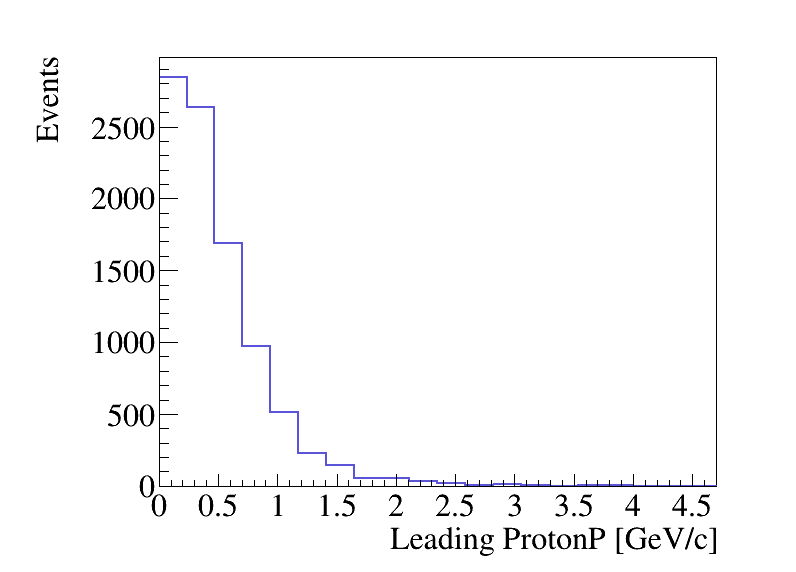

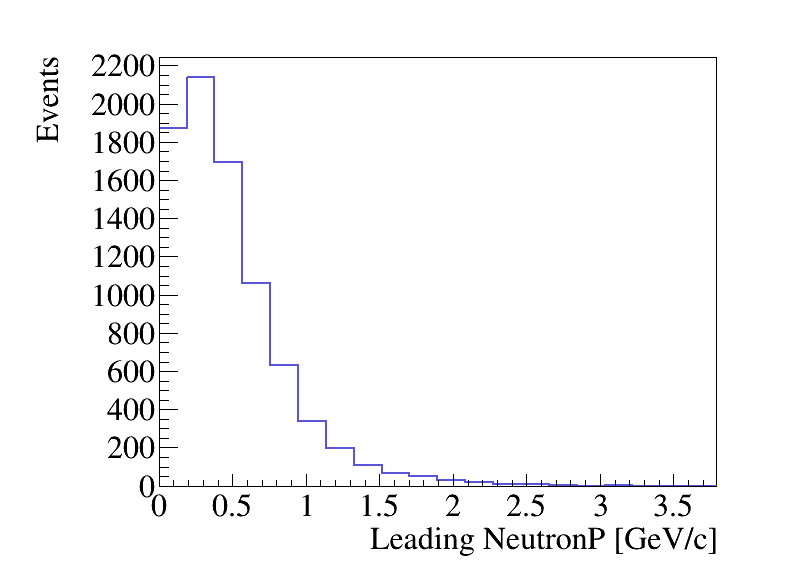

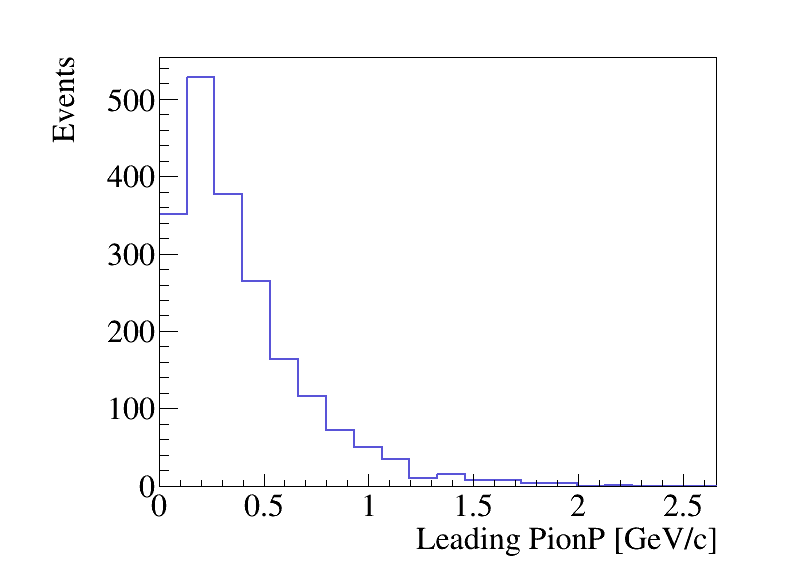

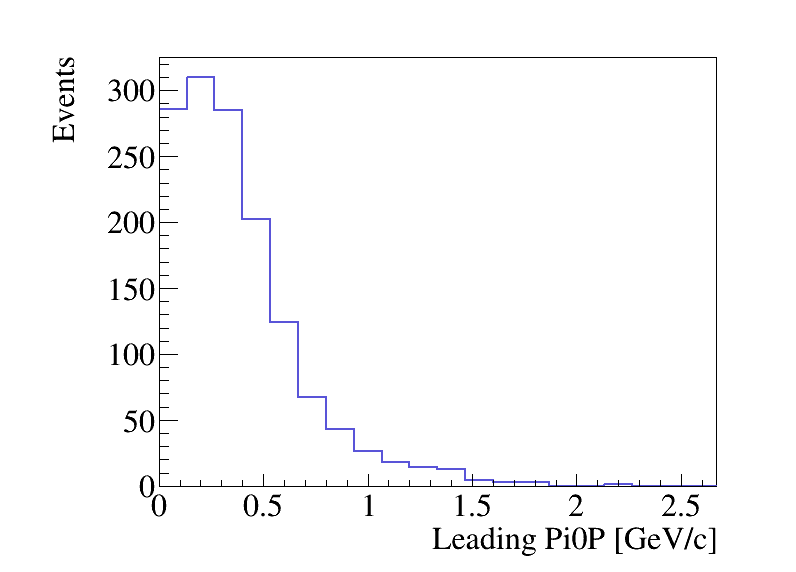

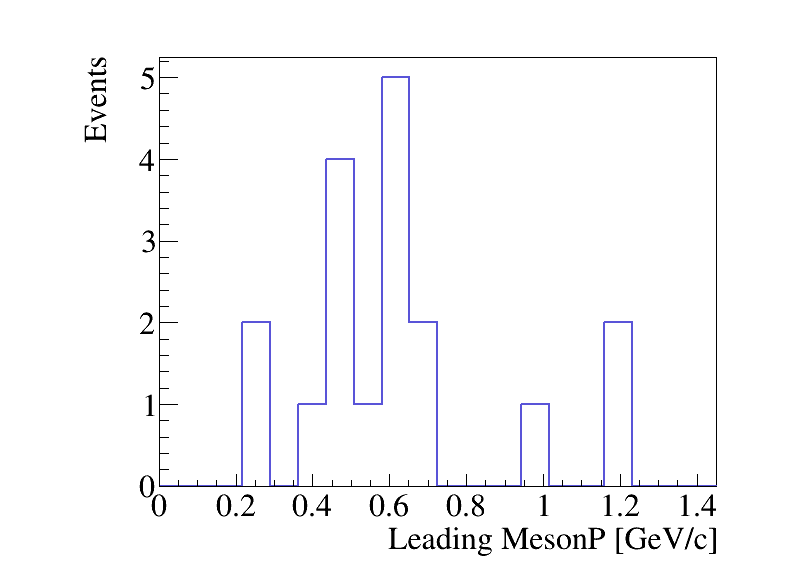

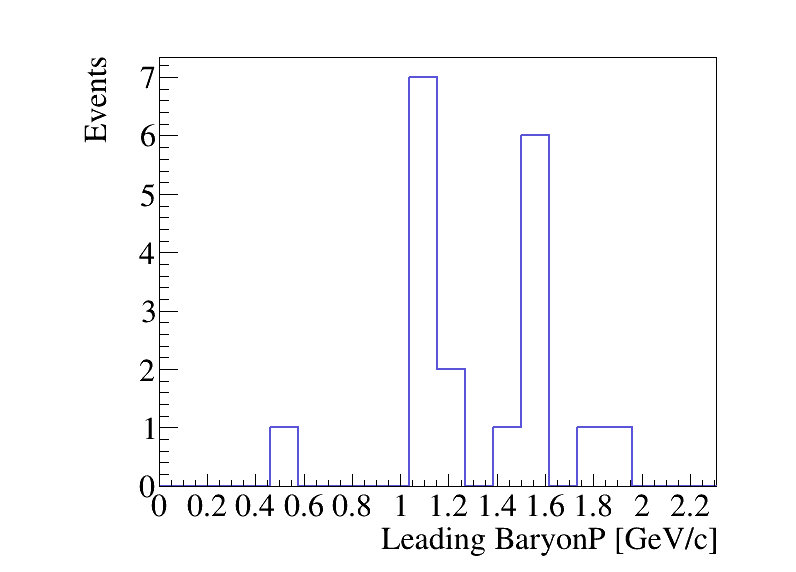

In [5]:
for i in particles:
    hN_P[i] = ROOT.TH1F("%sP" % i, "", 20, 0, max(max_particle_P[i])*1.2)
    
    hN_P[i].GetXaxis().SetTitle("Leading %sP [GeV/c]" % i)
    hN_P[i].GetYaxis().SetTitle("Events")
    
    hN_P[i].SetLineColor(9)
    hN_P[i].SetLineWidth(2)
    hN_P[i].GetXaxis().SetTitleFont(132)
    hN_P[i].GetXaxis().SetLabelFont(132)
    hN_P[i].GetYaxis().SetTitleFont(132)
    hN_P[i].GetYaxis().SetLabelFont(132)
    
    hN_P[i].GetXaxis().SetLabelSize(0.06)
    hN_P[i].GetXaxis().SetTitleSize(0.06)
    hN_P[i].GetYaxis().SetLabelSize(0.06)
    hN_P[i].GetYaxis().SetTitleSize(0.06)
    
    cN_P[i] = ROOT.TCanvas("%sP" % i, "Leading %s P" % i, 800, 600)
    cN_P[i].SetBottomMargin(0.15)
    cN_P[i].SetLeftMargin(0.2)
    
    cN_P[i].Draw()
    hN_P[i].Draw()
    
    for j in max_particle_P[i]:
        hN_P[i].Fill(j)

Now I want to graph the leading energies of the different particle types.

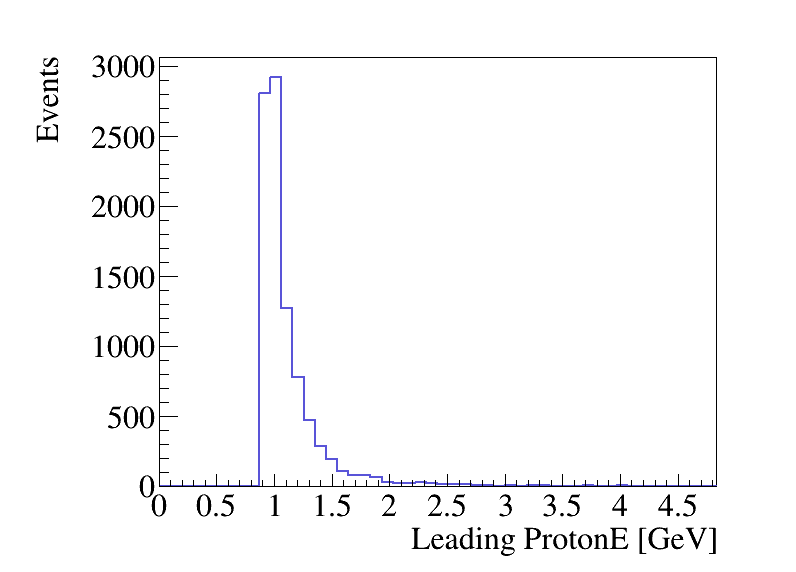

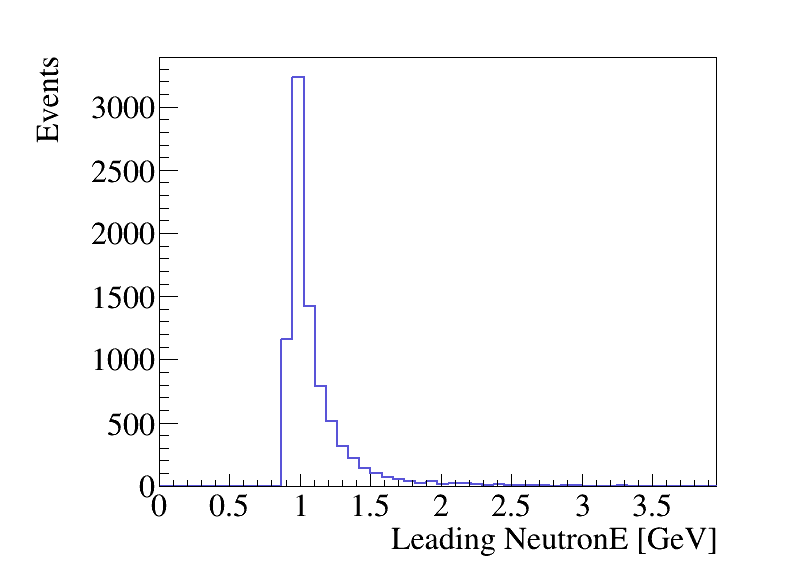

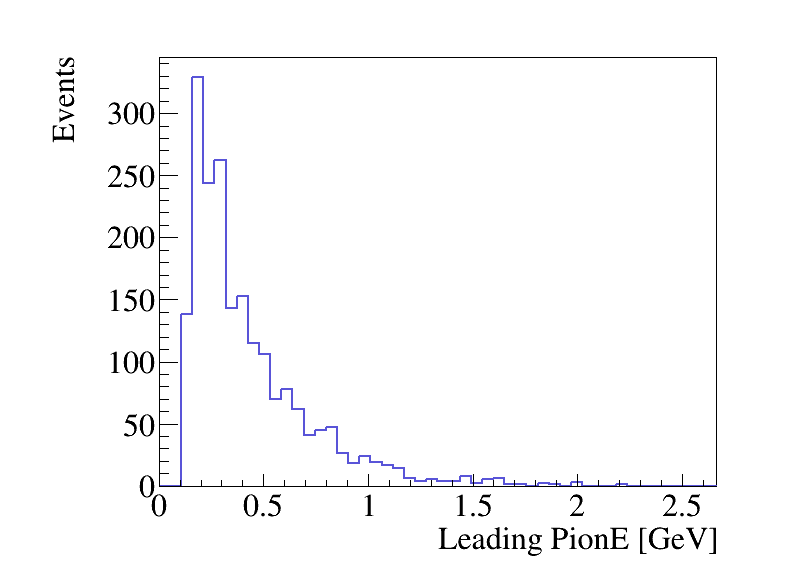

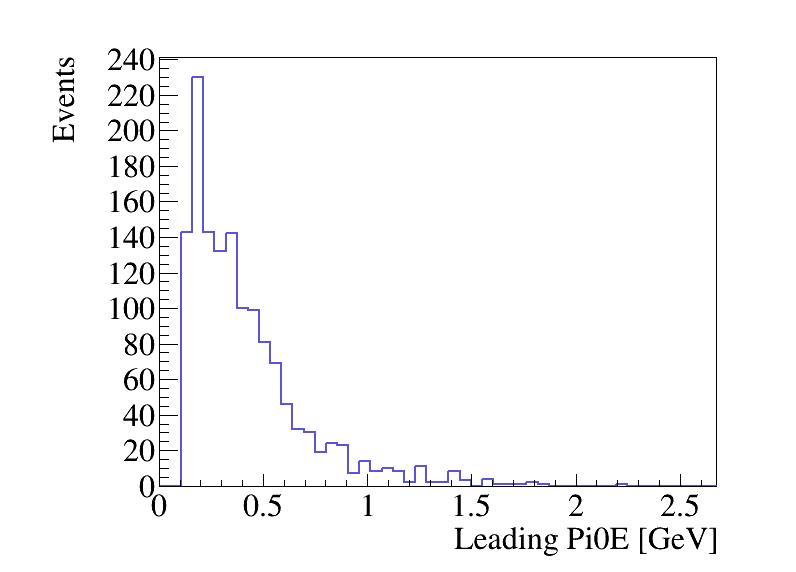

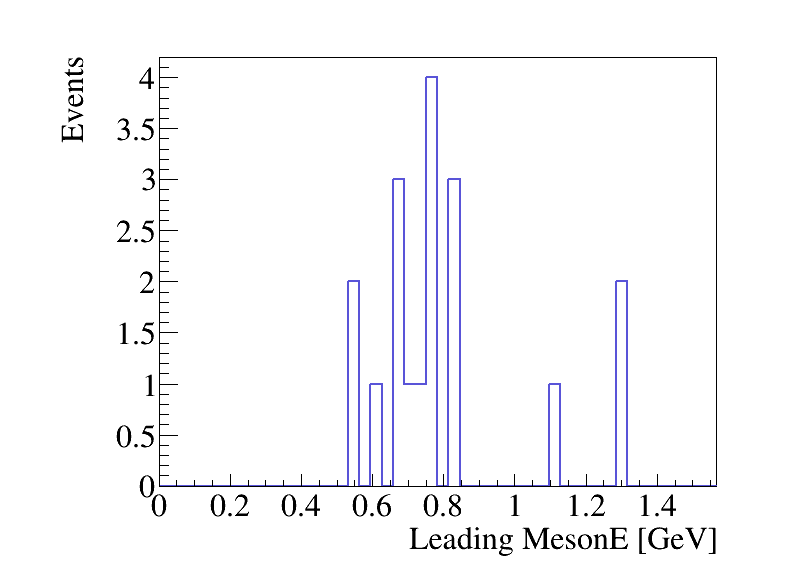

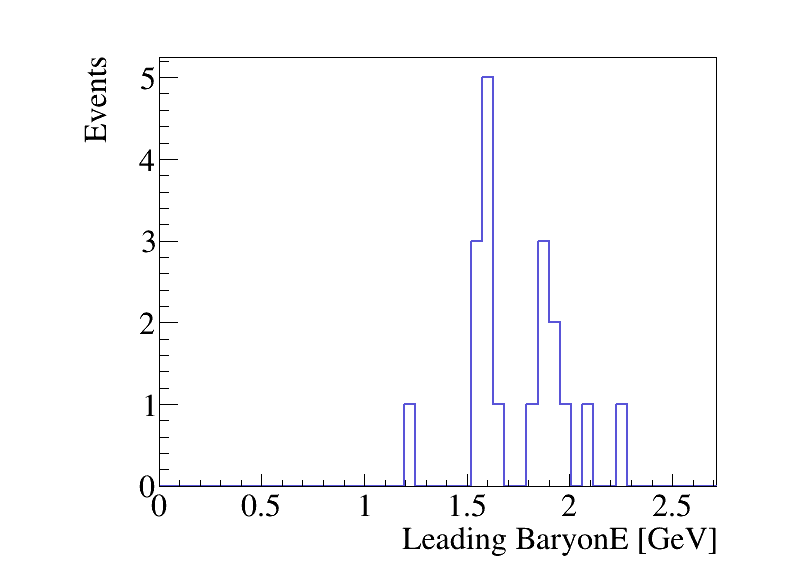

In [6]:
for i in particles:
    hN_E[i] = ROOT.TH1F("%sE" % i, "", 50, 0, max(max_particle_E[i])*1.2)
    
    hN_E[i].GetXaxis().SetTitle("Leading %sE [GeV]" % i)
    hN_E[i].GetYaxis().SetTitle("Events")
    
    hN_E[i].SetLineColor(9)
    hN_E[i].SetLineWidth(2)
    hN_E[i].GetXaxis().SetTitleFont(132)
    hN_E[i].GetXaxis().SetLabelFont(132)
    hN_E[i].GetYaxis().SetTitleFont(132)
    hN_E[i].GetYaxis().SetLabelFont(132)
    
    hN_E[i].GetXaxis().SetLabelSize(0.06)
    hN_E[i].GetXaxis().SetTitleSize(0.06)
    hN_E[i].GetYaxis().SetLabelSize(0.06)
    hN_E[i].GetYaxis().SetTitleSize(0.06)
    
    cN_E[i] = ROOT.TCanvas("%sE" % i, "Leading %s E" % i, 800, 600)
    cN_E[i].SetBottomMargin(0.15)
    cN_E[i].SetLeftMargin(0.2)
    
    cN_E[i].Draw()
    hN_E[i].Draw()
    
    for j in max_particle_E[i]:
        hN_E[i].Fill(j)

Now I want to graph the histograms showing the overall leading momenta moduli and energies for all particle types within a single event.

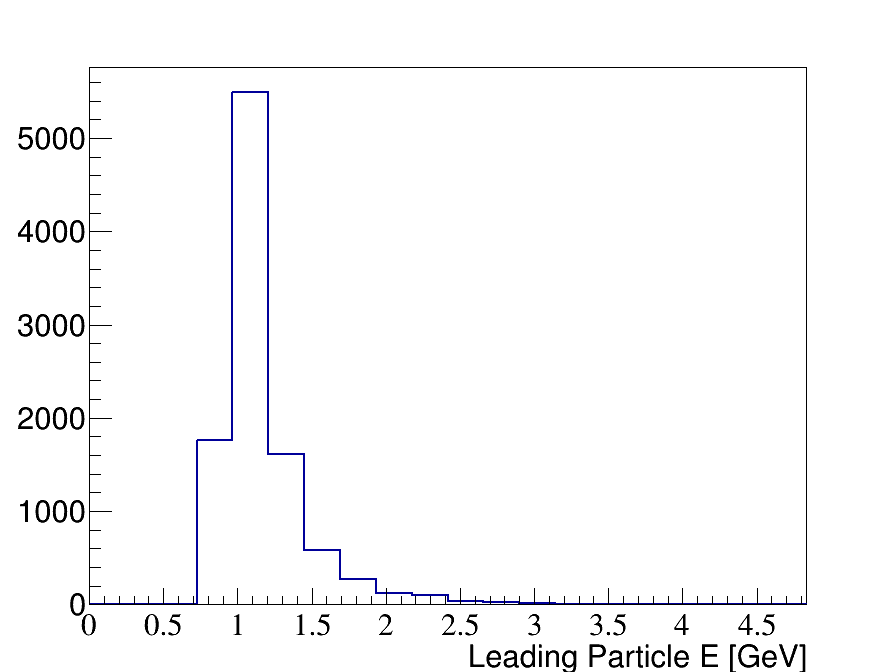

In [7]:
h_E = ROOT.TH1F("LeadingE", "", 20, 0, max(max_overall_E)*1.2)
c_E = ROOT.TCanvas("LeadingE", "Leading Particle E", 900, 700)

h_E.GetXaxis().SetTitle("Leading Particle E [GeV]")
h_E.GetYaxis().SetTitle("Events")
h_E.SetLineWidth(2)
h_E.GetXaxis().SetLabelFont(132)
h_E.GetYaxis().SetTitleFont(132)

h_E.GetXaxis().SetLabelSize(0.05)
h_E.GetXaxis().SetTitleSize(0.05)
h_E.GetYaxis().SetLabelSize(0.05)
h_E.GetYaxis().SetTitleSize(0.05)

c_E.Draw()
h_E.Draw()

for i in max_overall_E:
    h_E.Fill(i)

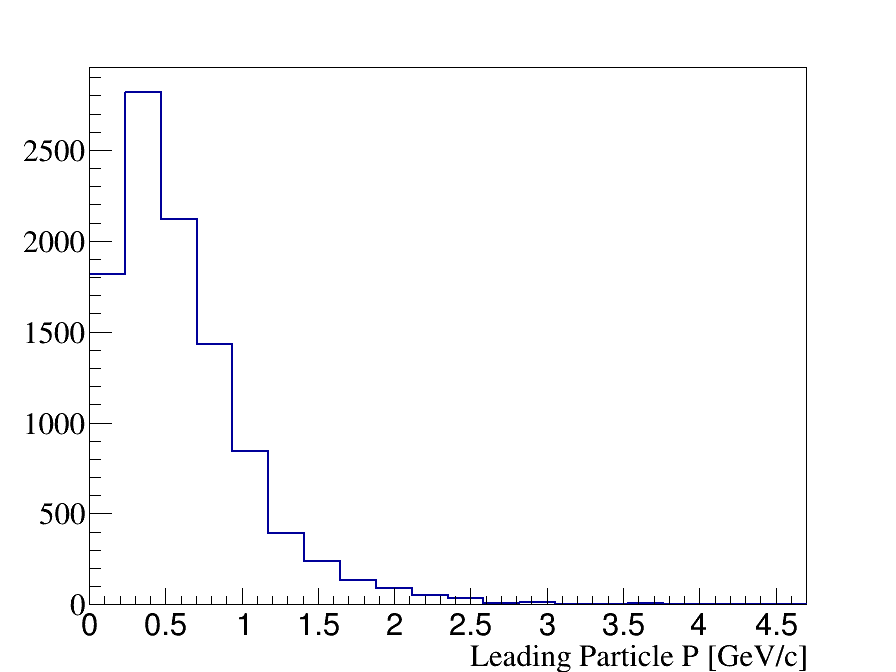

In [8]:
h_P = ROOT.TH1F("LeadingP", "", 20, 0, max(max_overall_P)*1.2)
c_P = ROOT.TCanvas("LeadingP", "Leading Particle P", 900, 700)

h_P.GetXaxis().SetTitle("Leading Particle P [GeV/c]")
h_P.GetYaxis().SetTitle("Events")
h_P.SetLineWidth(2)
h_P.GetXaxis().SetTitleFont(132)
h_P.GetYaxis().SetLabelFont(132)

h_P.GetXaxis().SetLabelSize(0.05)
h_P.GetXaxis().SetTitleSize(0.05)
h_P.GetYaxis().SetLabelSize(0.05)
h_P.GetYaxis().SetTitleSize(0.05)

c_P.Draw()
h_P.Draw()

for i in max_overall_P:
    h_P.Fill(i)

In [9]:
filename = 'ProtonE.png'
cN_E['Proton'].SaveAs(filename)

Info in <TCanvas::Print>: png file ProtonE.png has been created


In [10]:
filename2 = 'PiP.png'
cN_P['Pi0'].SaveAs(filename2)

Info in <TCanvas::Print>: png file PiP.png has been created


# Directional Momentum Analysis

The dictionaries "eventN_f_pi" hold the summed px, py, and pz values of all final state particles. The keys are event numbers and the values are the summed momenta values.

In [11]:
eventN_f_px = {}
eventN_f_py = {}
eventN_f_pz = {}
eventN_f_E = {}

In [12]:
counter = 1
for i in t:
    event_f_px = 0
    event_f_py = 0
    event_f_pz = 0
    event_f_E = 0
    
    for j in particles:
        px_arg = "i.%sPx" % j
        py_arg = "i.%sPy" % j
        pz_arg = "i.%sPz" % j
        E_arg = "i.%sE" % j
        
        if len(eval(px_arg)) > 0:
            for k in eval(px_arg):
                event_f_px += k
                
        if len(eval(py_arg)) > 0:
            for k in eval(py_arg):
                event_f_py += k
                
        if len(eval(pz_arg)) > 0:
            for k in eval(pz_arg):
                event_f_pz += k
                
        if len(eval(E_arg)) > 0:
            for k in eval(E_arg):
                event_f_E += k
                
        eventN_f_px[counter] = event_f_px
        eventN_f_py[counter] = event_f_py
        eventN_f_pz[counter] = event_f_pz
        eventN_f_E[counter] = event_f_E
        
    counter += 1

In [13]:
counting = 1
for i in t:
    summed = 0
    print "Event %d" % counting
    print "-------------------"
    if len(i.ProtonPx) > 0:
        for j in i.ProtonPx:
            summed += j
    if len(i.NeutronPx) > 0:
        for j in i.NeutronPx:
            summed += j
    if len(i.PionPx) > 0:
        for j in i.PionPx:
            summed += j
    if len(i.Pi0Px) > 0:
        for j in i.Pi0Px:
            summed += j
    if len(i.MesonPx) > 0:
        for j in i.MesonPx:
            summed += j
    if len(i.BaryonPx) > 0:
        for j in i.BaryonPx:
            summed += j
    print "SUM: %fl" % summed 
    print "-------------------\n\n"
    counting += 1

Event 1
-------------------
SUM: 0.605064l
-------------------


Event 2
-------------------
SUM: -0.378797l
-------------------


Event 3
-------------------
SUM: 0.316445l
-------------------


Event 4
-------------------
SUM: 2.076807l
-------------------


Event 5
-------------------
SUM: -0.182743l
-------------------


Event 6
-------------------
SUM: 0.414211l
-------------------


Event 7
-------------------
SUM: 0.381187l
-------------------


Event 8
-------------------
SUM: 0.518487l
-------------------


Event 9
-------------------
SUM: 0.334642l
-------------------


Event 10
-------------------
SUM: -0.062896l
-------------------


Event 11
-------------------
SUM: -1.244596l
-------------------


Event 12
-------------------
SUM: -0.409517l
-------------------


Event 13
-------------------
SUM: 0.234759l
-------------------


Event 14
-------------------
SUM: -0.242551l
-------------------


Event 15
-------------------
SUM: 0.219930l
-------------------


Event 16
----

-------------------


Event 326
-------------------
SUM: -0.725191l
-------------------


Event 327
-------------------
SUM: -0.514077l
-------------------


Event 328
-------------------
SUM: -0.097777l
-------------------


Event 329
-------------------
SUM: 0.410560l
-------------------


Event 330
-------------------
SUM: -0.153023l
-------------------


Event 331
-------------------
SUM: 0.208128l
-------------------


Event 332
-------------------
SUM: 1.442579l
-------------------


Event 333
-------------------
SUM: 0.137292l
-------------------


Event 334
-------------------
SUM: 0.020733l
-------------------


Event 335
-------------------
SUM: -0.258952l
-------------------


Event 336
-------------------
SUM: -0.291075l
-------------------


Event 337
-------------------
SUM: -0.007364l
-------------------


Event 338
-------------------
SUM: 0.144261l
-------------------


Event 339
-------------------
SUM: 1.781820l
-------------------


Event 340
-------------------
SUM

-------------------
SUM: 0.698160l
-------------------


Event 581
-------------------
SUM: -0.151271l
-------------------


Event 582
-------------------
SUM: -0.037869l
-------------------


Event 583
-------------------
SUM: 0.142409l
-------------------


Event 584
-------------------
SUM: -0.278372l
-------------------


Event 585
-------------------
SUM: 0.525706l
-------------------


Event 586
-------------------
SUM: -0.213567l
-------------------


Event 587
-------------------
SUM: -0.230818l
-------------------


Event 588
-------------------
SUM: 0.910060l
-------------------


Event 589
-------------------
SUM: 0.635633l
-------------------


Event 590
-------------------
SUM: 0.240593l
-------------------


Event 591
-------------------
SUM: 0.250185l
-------------------


Event 592
-------------------
SUM: -0.490393l
-------------------


Event 593
-------------------
SUM: 0.646666l
-------------------


Event 594
-------------------
SUM: 0.659391l
-------------------



-------------------
SUM: -0.062559l
-------------------


Event 850
-------------------
SUM: -0.562449l
-------------------


Event 851
-------------------
SUM: 1.083199l
-------------------


Event 852
-------------------
SUM: -0.036698l
-------------------


Event 853
-------------------
SUM: 1.349984l
-------------------


Event 854
-------------------
SUM: 0.266616l
-------------------


Event 855
-------------------
SUM: -0.411607l
-------------------


Event 856
-------------------
SUM: 0.209196l
-------------------


Event 857
-------------------
SUM: 0.060144l
-------------------


Event 858
-------------------
SUM: -0.208424l
-------------------


Event 859
-------------------
SUM: 0.105201l
-------------------


Event 860
-------------------
SUM: 0.477326l
-------------------


Event 861
-------------------
SUM: -0.322102l
-------------------


Event 862
-------------------
SUM: -0.176863l
-------------------


Event 863
-------------------
SUM: -0.499051l
-------------------

-------------------
SUM: -0.706789l
-------------------


Event 1086
-------------------
SUM: -0.212411l
-------------------


Event 1087
-------------------
SUM: 0.000000l
-------------------


Event 1088
-------------------
SUM: 0.483417l
-------------------


Event 1089
-------------------
SUM: -0.007181l
-------------------


Event 1090
-------------------
SUM: -0.762001l
-------------------


Event 1091
-------------------
SUM: 1.005918l
-------------------


Event 1092
-------------------
SUM: 0.299424l
-------------------


Event 1093
-------------------
SUM: 1.048235l
-------------------


Event 1094
-------------------
SUM: -0.386161l
-------------------


Event 1095
-------------------
SUM: 1.796425l
-------------------


Event 1096
-------------------
SUM: 1.451622l
-------------------


Event 1097
-------------------
SUM: 0.269832l
-------------------


Event 1098
-------------------
SUM: 1.367086l
-------------------


Event 1099
-------------------
SUM: -0.115890l
-------

-------------------
SUM: 0.141460l
-------------------


Event 1389
-------------------
SUM: 2.028196l
-------------------


Event 1390
-------------------
SUM: -0.232328l
-------------------


Event 1391
-------------------
SUM: 0.509217l
-------------------


Event 1392
-------------------
SUM: -0.812127l
-------------------


Event 1393
-------------------
SUM: 0.788683l
-------------------


Event 1394
-------------------
SUM: 0.727897l
-------------------


Event 1395
-------------------
SUM: 0.380153l
-------------------


Event 1396
-------------------
SUM: -0.307799l
-------------------


Event 1397
-------------------
SUM: 1.997230l
-------------------


Event 1398
-------------------
SUM: -0.086113l
-------------------


Event 1399
-------------------
SUM: 0.591192l
-------------------


Event 1400
-------------------
SUM: 1.154127l
-------------------


Event 1401
-------------------
SUM: 0.224173l
-------------------


Event 1402
-------------------
SUM: -0.123855l
--------

-------------------
SUM: 2.433385l
-------------------


Event 1643
-------------------
SUM: 0.508714l
-------------------


Event 1644
-------------------
SUM: -1.223438l
-------------------


Event 1645
-------------------
SUM: -0.091029l
-------------------


Event 1646
-------------------
SUM: -0.448175l
-------------------


Event 1647
-------------------
SUM: -0.894946l
-------------------


Event 1648
-------------------
SUM: -0.393386l
-------------------


Event 1649
-------------------
SUM: -0.943637l
-------------------


Event 1650
-------------------
SUM: -0.097229l
-------------------


Event 1651
-------------------
SUM: 0.726527l
-------------------


Event 1652
-------------------
SUM: 0.153437l
-------------------


Event 1653
-------------------
SUM: 1.689073l
-------------------


Event 1654
-------------------
SUM: 0.764896l
-------------------


Event 1655
-------------------
SUM: -0.444081l
-------------------


Event 1656
-------------------
SUM: 0.214477l
-----

SUM: 0.733722l
-------------------


Event 1940
-------------------
SUM: 0.317352l
-------------------


Event 1941
-------------------
SUM: 0.170870l
-------------------


Event 1942
-------------------
SUM: -0.131840l
-------------------


Event 1943
-------------------
SUM: 0.000000l
-------------------


Event 1944
-------------------
SUM: -0.056888l
-------------------


Event 1945
-------------------
SUM: 0.148425l
-------------------


Event 1946
-------------------
SUM: 0.167061l
-------------------


Event 1947
-------------------
SUM: 0.187575l
-------------------


Event 1948
-------------------
SUM: 0.063458l
-------------------


Event 1949
-------------------
SUM: 0.027084l
-------------------


Event 1950
-------------------
SUM: -0.170639l
-------------------


Event 1951
-------------------
SUM: -0.059300l
-------------------


Event 1952
-------------------
SUM: 0.050967l
-------------------


Event 1953
-------------------
SUM: -0.028013l
-------------------


Event 

Event 2225
-------------------
SUM: -0.396943l
-------------------


Event 2226
-------------------
SUM: -0.409595l
-------------------


Event 2227
-------------------
SUM: 0.215778l
-------------------


Event 2228
-------------------
SUM: 0.134417l
-------------------


Event 2229
-------------------
SUM: -0.535964l
-------------------


Event 2230
-------------------
SUM: 0.117009l
-------------------


Event 2231
-------------------
SUM: 0.041739l
-------------------


Event 2232
-------------------
SUM: 0.084969l
-------------------


Event 2233
-------------------
SUM: 0.348790l
-------------------


Event 2234
-------------------
SUM: -0.486267l
-------------------


Event 2235
-------------------
SUM: -0.300950l
-------------------


Event 2236
-------------------
SUM: -0.942681l
-------------------


Event 2237
-------------------
SUM: -0.034672l
-------------------


Event 2238
-------------------
SUM: -0.200514l
-------------------


Event 2239
-------------------
SUM: 0.51

-------------------
SUM: -0.512277l
-------------------


Event 2483
-------------------
SUM: -0.143218l
-------------------


Event 2484
-------------------
SUM: 0.568713l
-------------------


Event 2485
-------------------
SUM: -0.363192l
-------------------


Event 2486
-------------------
SUM: -1.072224l
-------------------


Event 2487
-------------------
SUM: -3.162449l
-------------------


Event 2488
-------------------
SUM: 0.396413l
-------------------


Event 2489
-------------------
SUM: 0.079094l
-------------------


Event 2490
-------------------
SUM: 0.129501l
-------------------


Event 2491
-------------------
SUM: 0.124021l
-------------------


Event 2492
-------------------
SUM: -0.341927l
-------------------


Event 2493
-------------------
SUM: 1.632414l
-------------------


Event 2494
-------------------
SUM: -0.061540l
-------------------


Event 2495
-------------------
SUM: 0.133971l
-------------------


Event 2496
-------------------
SUM: 2.772848l
------


Event 2752
-------------------
SUM: -1.316694l
-------------------


Event 2753
-------------------
SUM: -0.551033l
-------------------


Event 2754
-------------------
SUM: 0.451612l
-------------------


Event 2755
-------------------
SUM: 0.466987l
-------------------


Event 2756
-------------------
SUM: 0.006826l
-------------------


Event 2757
-------------------
SUM: -0.230021l
-------------------


Event 2758
-------------------
SUM: -1.497576l
-------------------


Event 2759
-------------------
SUM: -0.903946l
-------------------


Event 2760
-------------------
SUM: -0.402668l
-------------------


Event 2761
-------------------
SUM: -0.283937l
-------------------


Event 2762
-------------------
SUM: 0.086741l
-------------------


Event 2763
-------------------
SUM: 0.857680l
-------------------


Event 2764
-------------------
SUM: -0.815420l
-------------------


Event 2765
-------------------
SUM: 0.542836l
-------------------


Event 2766
-------------------
SUM: -0.

Event 3037
-------------------
SUM: 0.134362l
-------------------


Event 3038
-------------------
SUM: -0.158804l
-------------------


Event 3039
-------------------
SUM: -0.165865l
-------------------


Event 3040
-------------------
SUM: -0.506959l
-------------------


Event 3041
-------------------
SUM: 0.205405l
-------------------


Event 3042
-------------------
SUM: 0.487742l
-------------------


Event 3043
-------------------
SUM: 1.649055l
-------------------


Event 3044
-------------------
SUM: 0.889134l
-------------------


Event 3045
-------------------
SUM: 0.175798l
-------------------


Event 3046
-------------------
SUM: -0.286138l
-------------------


Event 3047
-------------------
SUM: 0.501034l
-------------------


Event 3048
-------------------
SUM: -0.131948l
-------------------


Event 3049
-------------------
SUM: 0.191852l
-------------------


Event 3050
-------------------
SUM: -0.075177l
-------------------


Event 3051
-------------------
SUM: -0.285


Event 3326
-------------------
SUM: -0.760240l
-------------------


Event 3327
-------------------
SUM: 0.399214l
-------------------


Event 3328
-------------------
SUM: 0.026311l
-------------------


Event 3329
-------------------
SUM: 0.309582l
-------------------


Event 3330
-------------------
SUM: -0.158804l
-------------------


Event 3331
-------------------
SUM: 0.629515l
-------------------


Event 3332
-------------------
SUM: -0.718849l
-------------------


Event 3333
-------------------
SUM: 2.169102l
-------------------


Event 3334
-------------------
SUM: 0.187945l
-------------------


Event 3335
-------------------
SUM: 0.144872l
-------------------


Event 3336
-------------------
SUM: -0.169704l
-------------------


Event 3337
-------------------
SUM: -2.755098l
-------------------


Event 3338
-------------------
SUM: 0.656627l
-------------------


Event 3339
-------------------
SUM: 0.111657l
-------------------


Event 3340
-------------------
SUM: 1.1413


Event 3626
-------------------
SUM: 0.078127l
-------------------


Event 3627
-------------------
SUM: 0.470122l
-------------------


Event 3628
-------------------
SUM: 0.930635l
-------------------


Event 3629
-------------------
SUM: -0.134535l
-------------------


Event 3630
-------------------
SUM: 0.467523l
-------------------


Event 3631
-------------------
SUM: -0.528892l
-------------------


Event 3632
-------------------
SUM: -0.415830l
-------------------


Event 3633
-------------------
SUM: -0.822227l
-------------------


Event 3634
-------------------
SUM: 0.794661l
-------------------


Event 3635
-------------------
SUM: -0.385102l
-------------------


Event 3636
-------------------
SUM: 0.000000l
-------------------


Event 3637
-------------------
SUM: 0.307491l
-------------------


Event 3638
-------------------
SUM: -0.388238l
-------------------


Event 3639
-------------------
SUM: 0.000000l
-------------------


Event 3640
-------------------
SUM: 0.550

Event 3906
-------------------
SUM: -0.446481l
-------------------


Event 3907
-------------------
SUM: -0.313015l
-------------------


Event 3908
-------------------
SUM: -0.674779l
-------------------


Event 3909
-------------------
SUM: -0.410898l
-------------------


Event 3910
-------------------
SUM: -1.894346l
-------------------


Event 3911
-------------------
SUM: 0.068579l
-------------------


Event 3912
-------------------
SUM: -0.468735l
-------------------


Event 3913
-------------------
SUM: 0.237309l
-------------------


Event 3914
-------------------
SUM: -0.215895l
-------------------


Event 3915
-------------------
SUM: 0.000000l
-------------------


Event 3916
-------------------
SUM: -0.568643l
-------------------


Event 3917
-------------------
SUM: -0.121744l
-------------------


Event 3918
-------------------
SUM: 0.563224l
-------------------


Event 3919
-------------------
SUM: -0.742448l
-------------------


Event 3920
-------------------
SUM: -0

SUM: 0.013903l
-------------------


Event 4178
-------------------
SUM: -0.315861l
-------------------


Event 4179
-------------------
SUM: -0.093039l
-------------------


Event 4180
-------------------
SUM: -0.854934l
-------------------


Event 4181
-------------------
SUM: -0.504917l
-------------------


Event 4182
-------------------
SUM: -0.326349l
-------------------


Event 4183
-------------------
SUM: -0.440175l
-------------------


Event 4184
-------------------
SUM: 0.085225l
-------------------


Event 4185
-------------------
SUM: 0.232739l
-------------------


Event 4186
-------------------
SUM: 0.818257l
-------------------


Event 4187
-------------------
SUM: -0.181364l
-------------------


Event 4188
-------------------
SUM: -0.003501l
-------------------


Event 4189
-------------------
SUM: 2.264682l
-------------------


Event 4190
-------------------
SUM: -0.509695l
-------------------


Event 4191
-------------------
SUM: 0.174061l
-------------------


Ev

SUM: -0.007457l
-------------------


Event 4463
-------------------
SUM: 0.030602l
-------------------


Event 4464
-------------------
SUM: -0.276785l
-------------------


Event 4465
-------------------
SUM: -0.052810l
-------------------


Event 4466
-------------------
SUM: 0.031087l
-------------------


Event 4467
-------------------
SUM: -0.845988l
-------------------


Event 4468
-------------------
SUM: 0.354664l
-------------------


Event 4469
-------------------
SUM: -0.110426l
-------------------


Event 4470
-------------------
SUM: -0.537084l
-------------------


Event 4471
-------------------
SUM: 0.155046l
-------------------


Event 4472
-------------------
SUM: 0.742202l
-------------------


Event 4473
-------------------
SUM: 0.742658l
-------------------


Event 4474
-------------------
SUM: -0.317447l
-------------------


Event 4475
-------------------
SUM: 1.126141l
-------------------


Event 4476
-------------------
SUM: 0.187554l
-------------------


Even

Event 4743
-------------------
SUM: -1.148063l
-------------------


Event 4744
-------------------
SUM: 0.007196l
-------------------


Event 4745
-------------------
SUM: 1.248239l
-------------------


Event 4746
-------------------
SUM: 0.323496l
-------------------


Event 4747
-------------------
SUM: 0.079094l
-------------------


Event 4748
-------------------
SUM: 0.054086l
-------------------


Event 4749
-------------------
SUM: -0.236860l
-------------------


Event 4750
-------------------
SUM: -0.229344l
-------------------


Event 4751
-------------------
SUM: 1.915313l
-------------------


Event 4752
-------------------
SUM: -0.264048l
-------------------


Event 4753
-------------------
SUM: -0.868440l
-------------------


Event 4754
-------------------
SUM: 0.399325l
-------------------


Event 4755
-------------------
SUM: 3.050997l
-------------------


Event 4756
-------------------
SUM: 0.061482l
-------------------


Event 4757
-------------------
SUM: 0.15351


Event 5011
-------------------
SUM: 0.313304l
-------------------


Event 5012
-------------------
SUM: -3.100416l
-------------------


Event 5013
-------------------
SUM: 1.001522l
-------------------


Event 5014
-------------------
SUM: -0.130339l
-------------------


Event 5015
-------------------
SUM: 0.373076l
-------------------


Event 5016
-------------------
SUM: -0.970631l
-------------------


Event 5017
-------------------
SUM: 0.447267l
-------------------


Event 5018
-------------------
SUM: -0.350447l
-------------------


Event 5019
-------------------
SUM: 0.039985l
-------------------


Event 5020
-------------------
SUM: -0.037048l
-------------------


Event 5021
-------------------
SUM: -0.029188l
-------------------


Event 5022
-------------------
SUM: 0.314329l
-------------------


Event 5023
-------------------
SUM: -0.036051l
-------------------


Event 5024
-------------------
SUM: 0.334667l
-------------------


Event 5025
-------------------
SUM: 0.30

Event 5304
-------------------
SUM: 0.404226l
-------------------


Event 5305
-------------------
SUM: -0.160340l
-------------------


Event 5306
-------------------
SUM: 0.975904l
-------------------


Event 5307
-------------------
SUM: -1.280431l
-------------------


Event 5308
-------------------
SUM: 0.113364l
-------------------


Event 5309
-------------------
SUM: 0.035705l
-------------------


Event 5310
-------------------
SUM: 0.316720l
-------------------


Event 5311
-------------------
SUM: -0.375037l
-------------------


Event 5312
-------------------
SUM: 0.061799l
-------------------


Event 5313
-------------------
SUM: -0.096402l
-------------------


Event 5314
-------------------
SUM: -0.078042l
-------------------


Event 5315
-------------------
SUM: -0.327142l
-------------------


Event 5316
-------------------
SUM: -0.322096l
-------------------


Event 5317
-------------------
SUM: 0.259993l
-------------------


Event 5318
-------------------
SUM: 0.093

Event 5563
-------------------
SUM: -0.174427l
-------------------


Event 5564
-------------------
SUM: 0.119272l
-------------------


Event 5565
-------------------
SUM: -1.335768l
-------------------


Event 5566
-------------------
SUM: 0.913665l
-------------------


Event 5567
-------------------
SUM: -0.108893l
-------------------


Event 5568
-------------------
SUM: 0.873150l
-------------------


Event 5569
-------------------
SUM: 0.551109l
-------------------


Event 5570
-------------------
SUM: 0.561297l
-------------------


Event 5571
-------------------
SUM: -0.360098l
-------------------


Event 5572
-------------------
SUM: 2.667643l
-------------------


Event 5573
-------------------
SUM: -0.460708l
-------------------


Event 5574
-------------------
SUM: -1.006038l
-------------------


Event 5575
-------------------
SUM: -0.104501l
-------------------


Event 5576
-------------------
SUM: -0.329941l
-------------------


Event 5577
-------------------
SUM: 0.00

SUM: 1.874380l
-------------------


Event 5850
-------------------
SUM: -0.458097l
-------------------


Event 5851
-------------------
SUM: 0.475415l
-------------------


Event 5852
-------------------
SUM: 0.288668l
-------------------


Event 5853
-------------------
SUM: -0.115178l
-------------------


Event 5854
-------------------
SUM: 1.271836l
-------------------


Event 5855
-------------------
SUM: 0.000000l
-------------------


Event 5856
-------------------
SUM: -0.707723l
-------------------


Event 5857
-------------------
SUM: 0.206140l
-------------------


Event 5858
-------------------
SUM: -0.514598l
-------------------


Event 5859
-------------------
SUM: -0.009804l
-------------------


Event 5860
-------------------
SUM: -0.596950l
-------------------


Event 5861
-------------------
SUM: 0.627772l
-------------------


Event 5862
-------------------
SUM: 0.011582l
-------------------


Event 5863
-------------------
SUM: -0.395726l
-------------------


Even

SUM: 0.504313l
-------------------


Event 6130
-------------------
SUM: 0.841812l
-------------------


Event 6131
-------------------
SUM: -0.435126l
-------------------


Event 6132
-------------------
SUM: 0.186160l
-------------------


Event 6133
-------------------
SUM: 0.000000l
-------------------


Event 6134
-------------------
SUM: -0.784330l
-------------------


Event 6135
-------------------
SUM: 0.413215l
-------------------


Event 6136
-------------------
SUM: 0.641032l
-------------------


Event 6137
-------------------
SUM: 0.000000l
-------------------


Event 6138
-------------------
SUM: -1.345657l
-------------------


Event 6139
-------------------
SUM: 0.607267l
-------------------


Event 6140
-------------------
SUM: -0.008043l
-------------------


Event 6141
-------------------
SUM: -0.135151l
-------------------


Event 6142
-------------------
SUM: 0.868511l
-------------------


Event 6143
-------------------
SUM: 1.012304l
-------------------


Event 

-------------------
SUM: 0.562553l
-------------------


Event 6425
-------------------
SUM: -0.808195l
-------------------


Event 6426
-------------------
SUM: -0.855421l
-------------------


Event 6427
-------------------
SUM: 0.638578l
-------------------


Event 6428
-------------------
SUM: -0.581075l
-------------------


Event 6429
-------------------
SUM: 0.040207l
-------------------


Event 6430
-------------------
SUM: 0.390829l
-------------------


Event 6431
-------------------
SUM: 0.048577l
-------------------


Event 6432
-------------------
SUM: -0.853170l
-------------------


Event 6433
-------------------
SUM: 1.464789l
-------------------


Event 6434
-------------------
SUM: 0.440031l
-------------------


Event 6435
-------------------
SUM: 0.720718l
-------------------


Event 6436
-------------------
SUM: -0.395513l
-------------------


Event 6437
-------------------
SUM: 0.000143l
-------------------


Event 6438
-------------------
SUM: 1.477216l
--------


Event 6706
-------------------
SUM: -1.797791l
-------------------


Event 6707
-------------------
SUM: -0.251742l
-------------------


Event 6708
-------------------
SUM: 0.402143l
-------------------


Event 6709
-------------------
SUM: -0.157119l
-------------------


Event 6710
-------------------
SUM: -0.900582l
-------------------


Event 6711
-------------------
SUM: -0.604557l
-------------------


Event 6712
-------------------
SUM: 0.132486l
-------------------


Event 6713
-------------------
SUM: -0.128507l
-------------------


Event 6714
-------------------
SUM: 0.581630l
-------------------


Event 6715
-------------------
SUM: -0.401693l
-------------------


Event 6716
-------------------
SUM: -0.366053l
-------------------


Event 6717
-------------------
SUM: -0.712007l
-------------------


Event 6718
-------------------
SUM: 0.185306l
-------------------


Event 6719
-------------------
SUM: 0.164019l
-------------------


Event 6720
-------------------
SUM: 0.

-------------------
SUM: -0.056430l
-------------------


Event 6981
-------------------
SUM: 0.301918l
-------------------


Event 6982
-------------------
SUM: 0.375498l
-------------------


Event 6983
-------------------
SUM: -0.350794l
-------------------


Event 6984
-------------------
SUM: -0.273880l
-------------------


Event 6985
-------------------
SUM: 0.998362l
-------------------


Event 6986
-------------------
SUM: -0.660455l
-------------------


Event 6987
-------------------
SUM: 0.627811l
-------------------


Event 6988
-------------------
SUM: -0.595729l
-------------------


Event 6989
-------------------
SUM: -0.309178l
-------------------


Event 6990
-------------------
SUM: 0.188834l
-------------------


Event 6991
-------------------
SUM: -2.181833l
-------------------


Event 6992
-------------------
SUM: -0.032624l
-------------------


Event 6993
-------------------
SUM: 0.213728l
-------------------


Event 6994
-------------------
SUM: 0.260425l
-----

-------------------
SUM: -1.293236l
-------------------


Event 7235
-------------------
SUM: 0.505485l
-------------------


Event 7236
-------------------
SUM: 0.659605l
-------------------


Event 7237
-------------------
SUM: 0.732150l
-------------------


Event 7238
-------------------
SUM: -0.099230l
-------------------


Event 7239
-------------------
SUM: 0.020946l
-------------------


Event 7240
-------------------
SUM: -3.179246l
-------------------


Event 7241
-------------------
SUM: -0.172024l
-------------------


Event 7242
-------------------
SUM: 1.674306l
-------------------


Event 7243
-------------------
SUM: 0.389869l
-------------------


Event 7244
-------------------
SUM: 1.031674l
-------------------


Event 7245
-------------------
SUM: -0.161073l
-------------------


Event 7246
-------------------
SUM: 0.101190l
-------------------


Event 7247
-------------------
SUM: 0.469442l
-------------------


Event 7248
-------------------
SUM: 0.423313l
--------

-------------------
SUM: -0.167034l
-------------------


Event 7546
-------------------
SUM: 0.829751l
-------------------


Event 7547
-------------------
SUM: 1.363263l
-------------------


Event 7548
-------------------
SUM: 1.482412l
-------------------


Event 7549
-------------------
SUM: -0.198430l
-------------------


Event 7550
-------------------
SUM: -0.244672l
-------------------


Event 7551
-------------------
SUM: -0.150358l
-------------------


Event 7552
-------------------
SUM: -0.578885l
-------------------


Event 7553
-------------------
SUM: -0.479851l
-------------------


Event 7554
-------------------
SUM: -0.356575l
-------------------


Event 7555
-------------------
SUM: -0.153612l
-------------------


Event 7556
-------------------
SUM: -0.128153l
-------------------


Event 7557
-------------------
SUM: 0.000000l
-------------------


Event 7558
-------------------
SUM: 0.284320l
-------------------


Event 7559
-------------------
SUM: 0.418556l
----

SUM: -0.179360l
-------------------


Event 7839
-------------------
SUM: 0.186742l
-------------------


Event 7840
-------------------
SUM: 0.344521l
-------------------


Event 7841
-------------------
SUM: 0.297279l
-------------------


Event 7842
-------------------
SUM: 0.628223l
-------------------


Event 7843
-------------------
SUM: 1.104942l
-------------------


Event 7844
-------------------
SUM: 0.337434l
-------------------


Event 7845
-------------------
SUM: -0.051502l
-------------------


Event 7846
-------------------
SUM: -0.070966l
-------------------


Event 7847
-------------------
SUM: 1.024766l
-------------------


Event 7848
-------------------
SUM: 0.039343l
-------------------


Event 7849
-------------------
SUM: -0.754838l
-------------------


Event 7850
-------------------
SUM: -0.090413l
-------------------


Event 7851
-------------------
SUM: 0.115693l
-------------------


Event 7852
-------------------
SUM: 0.567534l
-------------------


Event 

Event 8118
-------------------
SUM: 0.335561l
-------------------


Event 8119
-------------------
SUM: -0.046858l
-------------------


Event 8120
-------------------
SUM: 0.954657l
-------------------


Event 8121
-------------------
SUM: 0.909690l
-------------------


Event 8122
-------------------
SUM: 1.090708l
-------------------


Event 8123
-------------------
SUM: 0.210455l
-------------------


Event 8124
-------------------
SUM: -0.865210l
-------------------


Event 8125
-------------------
SUM: 0.491035l
-------------------


Event 8126
-------------------
SUM: -0.445042l
-------------------


Event 8127
-------------------
SUM: -0.210392l
-------------------


Event 8128
-------------------
SUM: 0.088829l
-------------------


Event 8129
-------------------
SUM: 0.100266l
-------------------


Event 8130
-------------------
SUM: -0.152749l
-------------------


Event 8131
-------------------
SUM: 0.410515l
-------------------


Event 8132
-------------------
SUM: 0.21551

-------------------
SUM: -0.097666l
-------------------


Event 8370
-------------------
SUM: 0.663785l
-------------------


Event 8371
-------------------
SUM: -0.337844l
-------------------


Event 8372
-------------------
SUM: 0.168506l
-------------------


Event 8373
-------------------
SUM: 0.000000l
-------------------


Event 8374
-------------------
SUM: 0.215748l
-------------------


Event 8375
-------------------
SUM: -0.046064l
-------------------


Event 8376
-------------------
SUM: -0.282632l
-------------------


Event 8377
-------------------
SUM: 1.127717l
-------------------


Event 8378
-------------------
SUM: -0.534863l
-------------------


Event 8379
-------------------
SUM: -0.252512l
-------------------


Event 8380
-------------------
SUM: -0.334777l
-------------------


Event 8381
-------------------
SUM: -0.026285l
-------------------


Event 8382
-------------------
SUM: 0.301934l
-------------------


Event 8383
-------------------
SUM: -0.264480l
----

Event 8707
-------------------
SUM: -0.627900l
-------------------


Event 8708
-------------------
SUM: -0.009239l
-------------------


Event 8709
-------------------
SUM: 1.489154l
-------------------


Event 8710
-------------------
SUM: 0.617302l
-------------------


Event 8711
-------------------
SUM: 0.496648l
-------------------


Event 8712
-------------------
SUM: -0.352843l
-------------------


Event 8713
-------------------
SUM: -0.196532l
-------------------


Event 8714
-------------------
SUM: -0.417906l
-------------------


Event 8715
-------------------
SUM: 0.600884l
-------------------


Event 8716
-------------------
SUM: 1.749499l
-------------------


Event 8717
-------------------
SUM: -0.583848l
-------------------


Event 8718
-------------------
SUM: -0.102802l
-------------------


Event 8719
-------------------
SUM: -0.184519l
-------------------


Event 8720
-------------------
SUM: -0.094319l
-------------------


Event 8721
-------------------
SUM: -0.

SUM: 0.200543l
-------------------


Event 8931
-------------------
SUM: 0.012511l
-------------------


Event 8932
-------------------
SUM: 0.029149l
-------------------


Event 8933
-------------------
SUM: 0.435825l
-------------------


Event 8934
-------------------
SUM: 1.149466l
-------------------


Event 8935
-------------------
SUM: -0.284081l
-------------------


Event 8936
-------------------
SUM: 0.151586l
-------------------


Event 8937
-------------------
SUM: 0.616583l
-------------------


Event 8938
-------------------
SUM: -0.894299l
-------------------


Event 8939
-------------------
SUM: -1.873311l
-------------------


Event 8940
-------------------
SUM: 0.066515l
-------------------


Event 8941
-------------------
SUM: 0.000000l
-------------------


Event 8942
-------------------
SUM: 2.173934l
-------------------


Event 8943
-------------------
SUM: 0.835505l
-------------------


Event 8944
-------------------
SUM: 0.716783l
-------------------


Event 89

Event 9195
-------------------
SUM: 0.407630l
-------------------


Event 9196
-------------------
SUM: 0.014781l
-------------------


Event 9197
-------------------
SUM: -0.980964l
-------------------


Event 9198
-------------------
SUM: -0.041960l
-------------------


Event 9199
-------------------
SUM: 0.459776l
-------------------


Event 9200
-------------------
SUM: -0.451327l
-------------------


Event 9201
-------------------
SUM: -0.189047l
-------------------


Event 9202
-------------------
SUM: 0.302170l
-------------------


Event 9203
-------------------
SUM: 0.939475l
-------------------


Event 9204
-------------------
SUM: 0.597459l
-------------------


Event 9205
-------------------
SUM: 0.135788l
-------------------


Event 9206
-------------------
SUM: -0.093540l
-------------------


Event 9207
-------------------
SUM: 0.400607l
-------------------


Event 9208
-------------------
SUM: -0.135525l
-------------------


Event 9209
-------------------
SUM: -0.067

-------------------


Event 9495
-------------------
SUM: 0.125506l
-------------------


Event 9496
-------------------
SUM: -0.099100l
-------------------


Event 9497
-------------------
SUM: 0.714162l
-------------------


Event 9498
-------------------
SUM: 0.259736l
-------------------


Event 9499
-------------------
SUM: 0.304426l
-------------------


Event 9500
-------------------
SUM: -0.101719l
-------------------


Event 9501
-------------------
SUM: -0.537461l
-------------------


Event 9502
-------------------
SUM: 0.410500l
-------------------


Event 9503
-------------------
SUM: -0.379989l
-------------------


Event 9504
-------------------
SUM: -0.882644l
-------------------


Event 9505
-------------------
SUM: -0.377950l
-------------------


Event 9506
-------------------
SUM: -0.019989l
-------------------


Event 9507
-------------------
SUM: -0.283421l
-------------------


Event 9508
-------------------
SUM: 0.912523l
-------------------


Event 9509
-------

-------------------


Event 9810
-------------------
SUM: 0.499900l
-------------------


Event 9811
-------------------
SUM: -0.069810l
-------------------


Event 9812
-------------------
SUM: 0.132415l
-------------------


Event 9813
-------------------
SUM: 0.398330l
-------------------


Event 9814
-------------------
SUM: -1.275314l
-------------------


Event 9815
-------------------
SUM: -0.606167l
-------------------


Event 9816
-------------------
SUM: -0.069623l
-------------------


Event 9817
-------------------
SUM: 0.669930l
-------------------


Event 9818
-------------------
SUM: 0.224173l
-------------------


Event 9819
-------------------
SUM: -0.402647l
-------------------


Event 9820
-------------------
SUM: -0.023183l
-------------------


Event 9821
-------------------
SUM: 0.111753l
-------------------


Event 9822
-------------------
SUM: -0.094953l
-------------------


Event 9823
-------------------
SUM: -0.792237l
-------------------


Event 9824
-------

In [14]:
eventN_f_px

{1: 0.6050642174554635,
 2: -0.3787967120305311,
 3: 0.3164453046900149,
 4: 2.076806715028996,
 5: -0.1827426496768782,
 6: 0.4142106430153885,
 7: 0.3811866919515169,
 8: 0.5184872361512586,
 9: 0.33464209619865876,
 10: -0.06289577385434919,
 11: -1.244595594403866,
 12: -0.4095172783566503,
 13: 0.2347593131627239,
 14: -0.24255140884452345,
 15: 0.21993008935725047,
 16: 0.5344646178942833,
 17: 1.9161956753140166,
 18: 0.6084100590775701,
 19: 0.687240704117182,
 20: -0.6924452409775281,
 21: -0.018605131145599182,
 22: -0.6766972060288987,
 23: -0.3515476160108716,
 24: 0.3662282132385143,
 25: -0.2659794596953744,
 26: 1.0375378030575717,
 27: 0.044065125612472264,
 28: 0.09869622993743642,
 29: -0.027569127988233386,
 30: -0.013562832825034742,
 31: 0.0,
 32: -0.6657780214561094,
 33: 0.21174230443036596,
 34: -0.5777878628352716,
 35: 0.15105500623816706,
 36: 1.829295700404702,
 37: -0.5224797803508024,
 38: -0.19075511912829202,
 39: -0.53079975337483,
 40: 1.46098293443473

In [15]:
# counter = 1
# for i in t:
    
#     elif (leading_P == 0):
#         print "Event %d" % counter
#         print "------------------------"
#         print "Number of protons: %d" % i.nProtons
#         print "Number of neutrons: %d" % i.nNeutrons
#         print "Number of pions: %d" % i.nPions
#         print "Number of pi0s: %d" % i.nPi0s
#         print "Number of mesons: %d" % i.nMesons
#         print "Number of baryons: %d" % i.nBaryons
#         print "\n"
        
#         if (i.nProtons != 0):
#             for j in range(len(i.ProtonP)):
#                 print "Proton P: %f" % i.ProtonP[j]
#                 print "Proton Px: %f" % i.ProtonPx[j]
#                 print "Proton Py: %f" % i.ProtonPy[j]
#                 print "Proton Pz: %f" % i.ProtonPz[j]
#                 print "Proton E: %f\n" % i.ProtonE[j]
#         if (i.nNeutrons != 0):
#             for j in range(len(i.NeutronP)):
#                 print "Neutron P: %f" % i.NeutronP[j]
#                 print "Neutron Px: %f" % i.NeutronPx[j]
#                 print "Neutron Py: %f" % i.NeutronPy[j]
#                 print "Neutron Pz: %f" % i.NeutronPz[j]
#                 print "Neutron E: %f\n" % i.NeutronE[j]
#         if (i.nPions != 0):
#             for j in range(len(i.PionP)):
#                 print "Pion P: %f" % i.PionP[j]
#                 print "Pion Px: %f" % i.PionPx[j]
#                 print "Pion Py: %f" % i.PionPy[j]
#                 print "Pion Pz: %f" % i.PionPz[j]
#                 print "Pion E: %f\n" % i.PionE[j]
#         if (i.nPi0s != 0):
#             for j in range(len(i.Pi0P)):
#                 print "Pi0 P: %f" % i.Pi0P[j]
#                 print "Pi0 Px: %f" % i.Pi0Px[j]
#                 print "Pi0 Py: %f" % i.Pi0Py[j]
#                 print "Pi0 Pz: %f" % i.Pi0Pz[j]
#                 print "Pi0 E: %f\n" % i.Pi0E[j]
#         if (i.nMesons != 0):
#             for j in range(len(i.MesonP)):
#                 print "Meson P: %f" % i.MesonP[j]
#                 print "Meson Px: %f" % i.MesonPx[j]
#                 print "Meson Py: %f" % i.MesonPy[j]
#                 print "Meson Pz: %f" % i.MesonPz[j]
#                 print "Meson E: %f\n" % i.MesonE[j]
#         if (i.nBaryons != 0):
#             for j in range(len(i.BaryonP)):
#                 print "Baryon P: %f" % i.BaryonP[j]
#                 print "Baryon Px: %f" % i.BaryonPx[j]
#                 print "Baryon Py: %f" % i.BaryonPy[j]
#                 print "Baryon Pz: %f" % i.BaryonPz[j]
#                 print "Baryon E: %f\n" % i.BaryonE[j]

#         print "------------------------\n"
#     counter += 1